# Regression
Predicting final price of each home in Ames,Iowa. Number of origial explanatory varibales: 79

### Data Source 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In this project, we are using only train.csv file for regression tasks.

### Data Dictionary 

SalePrice - the property's sale price in dollars. This is the target variable.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
hsp_train = pd.read_csv("train.csv")

In [4]:
hsp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("The train data size is : {} ".format(hsp_train.shape))

The train data size is : (1460, 81) 


In [6]:
hsp_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
hsp_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price is 180921. The minimum price is 34900 and maximum is 755,000. The maximum price seems like an outlier

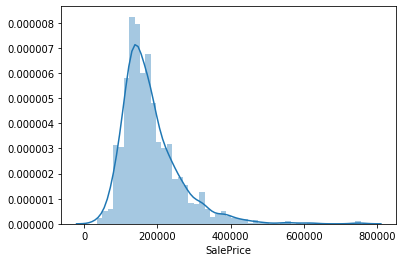

In [8]:
sns.distplot(hsp_train['SalePrice'])

The above plot doesn't look like a normal distribution, seems there are some outliers in the data.

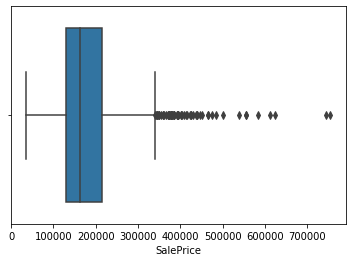

In [9]:
sns.boxplot(hsp_train['SalePrice'])

From the above plot, we can see that there are 2 outliers i.e SalePrice > 700000. So, it's better to delete them.

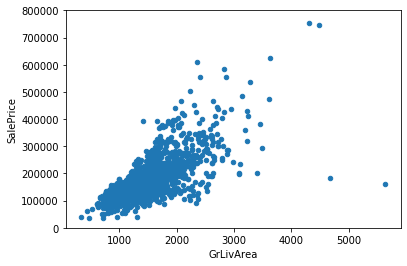

In [10]:
hsp_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

From the above plot, we can see that as living area increases, the saleprice also increases. But we can also see another 2 outliers i.e for larger GrLivArea the saleprice is low. But in general, that won't happen. So, we are deleting this 2 outliers also.

In [11]:
hsp_train = hsp_train.drop(hsp_train[(hsp_train['GrLivArea']>4000)].index)

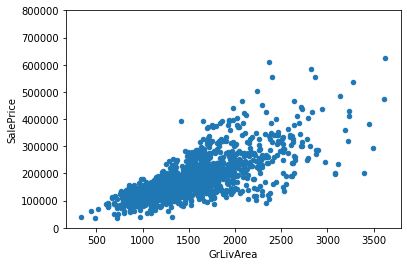

In [12]:
hsp_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

After deleting the outliers, we can see that the plot looks good.

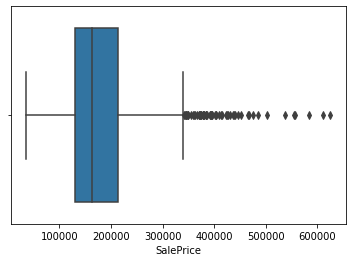

In [13]:
sns.boxplot(hsp_train['SalePrice'])

There are no ouliers in the plot.

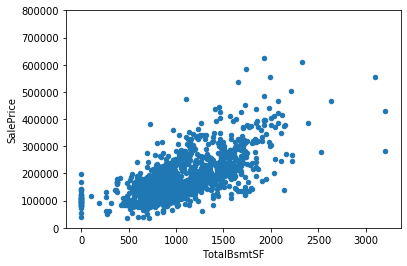

In [14]:
hsp_train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

From the above plot, we can see that as total basement area increases, the saleprice also increases. 

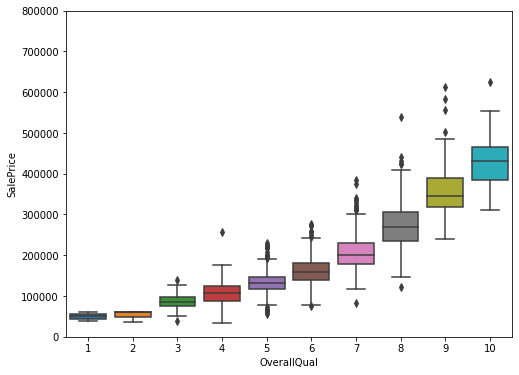

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=hsp_train)
fig.axis(ymin=0, ymax=800000);

From the above plot, we can see that as the overall quality increases, the mean of saleprice also increases.

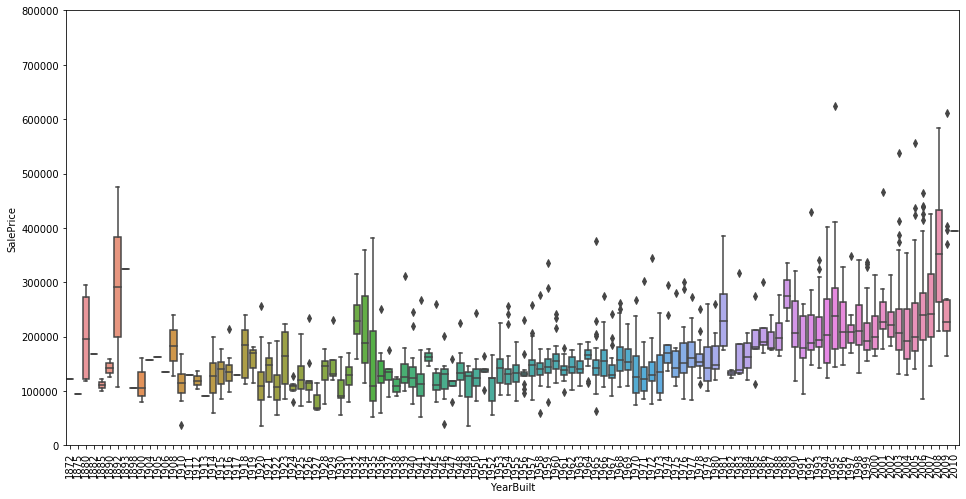

In [16]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=hsp_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

From the above boxplot, we can't see any particular trend in yearbuilt. But, we can cluster the years that has same mean saleprice.

Text(0.5, 1.0, 'Countplot of MSSubClass')

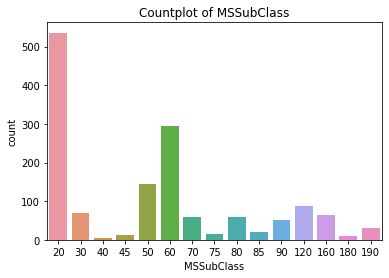

In [17]:
sns.countplot(hsp_train['MSSubClass'])
plt.title("Countplot of MSSubClass")

There are around 530 homes belonging to 1-story 1946 & newer all styles. Next, is 2-story 1946 & newer with around 300 and later is 1-1/2 story finished all ages.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

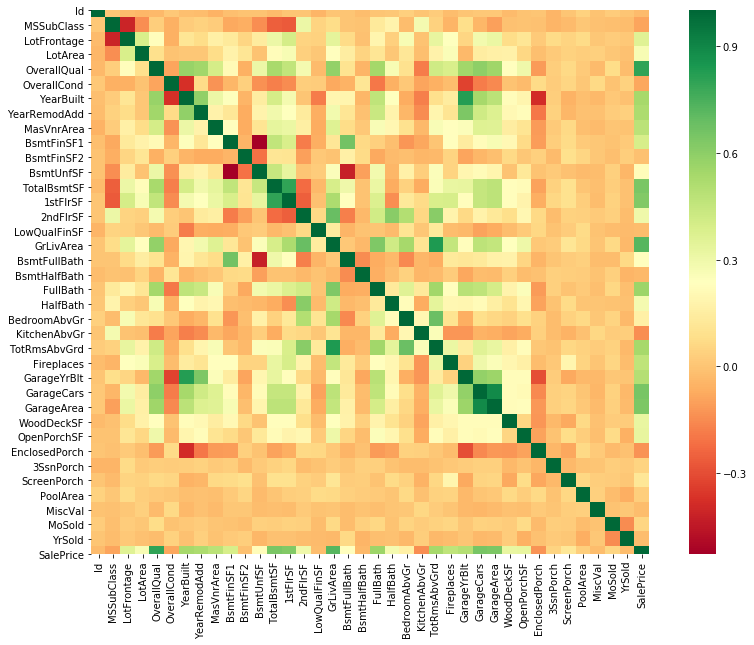

In [18]:
corrmat = hsp_train.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, square=True,cmap="RdYlGn");

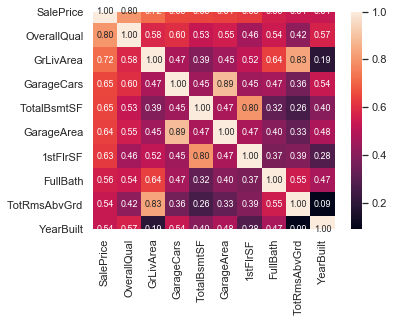

In [19]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hsp_train[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above plot gives us the largest correlated variables out of all.

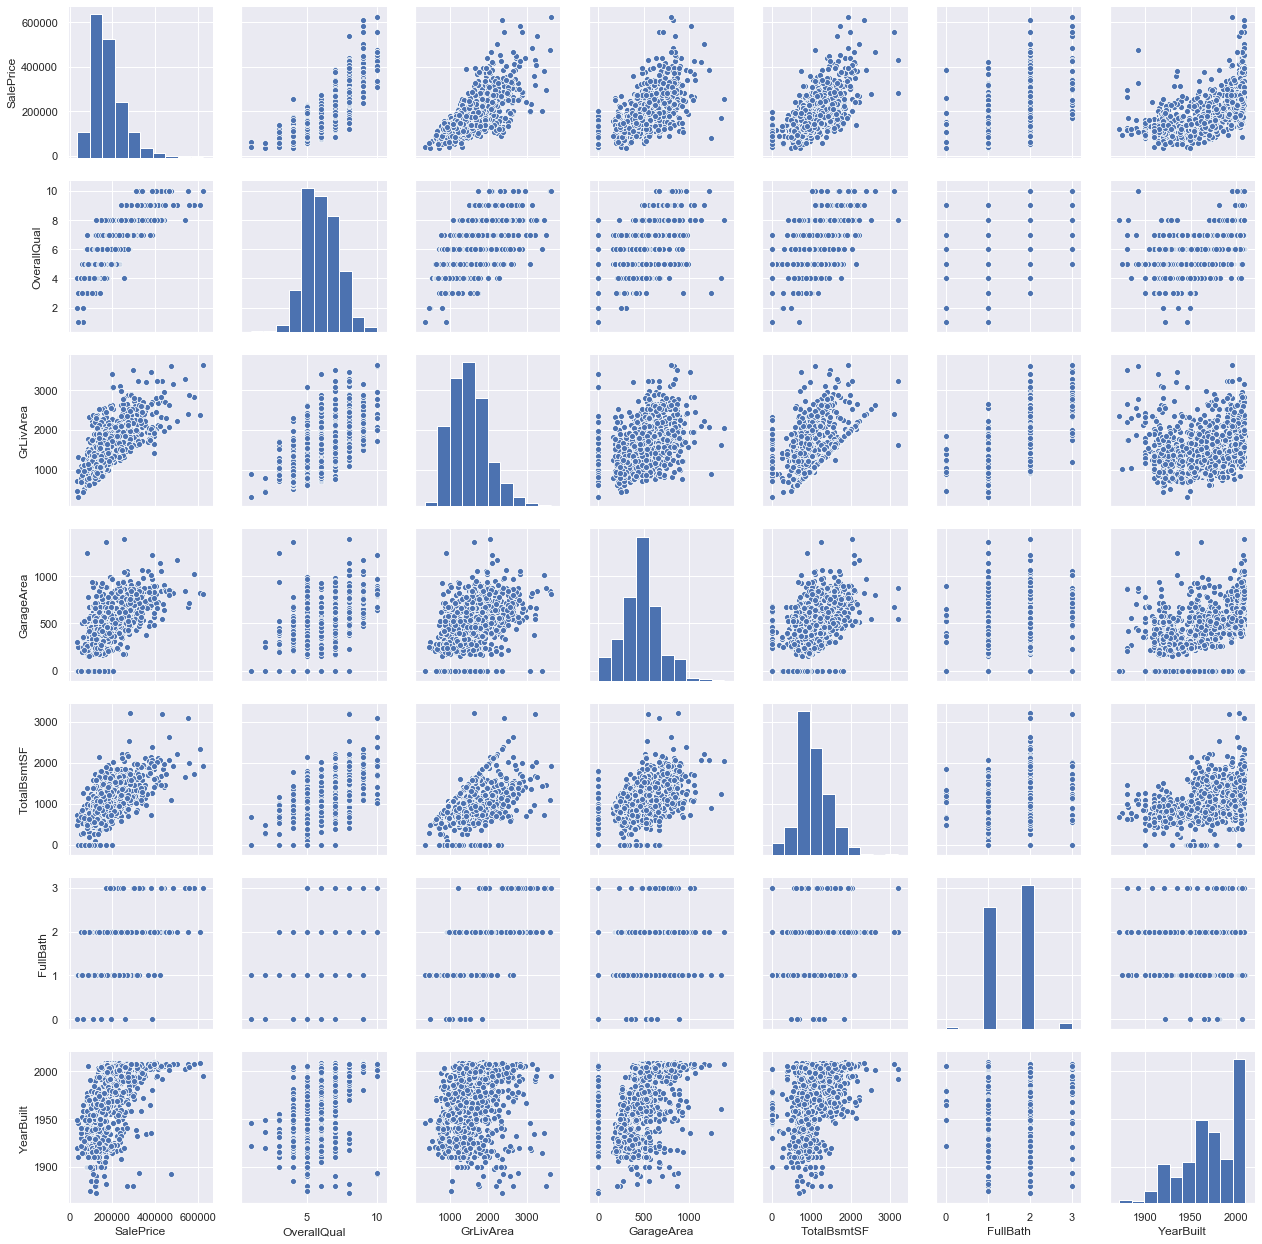

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(hsp_train[cols], size = 2.5)
plt.show();

In [21]:
miss = pd.DataFrame(hsp_train.isna().sum()[hsp_train.isna().sum() !=0].sort_values(ascending=False))
miss.columns = ['#Missing']
miss['Percent_Missing'] = hsp_train.isna().sum()/len(hsp_train) *100
miss

,#Missing,Percent_Missing
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageYrBlt,81,5.563187
GarageType,81,5.563187
GarageFinish,81,5.563187
GarageQual,81,5.563187


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of missing values')

Text(0.5, 1.0, 'Percent missing data by feature')

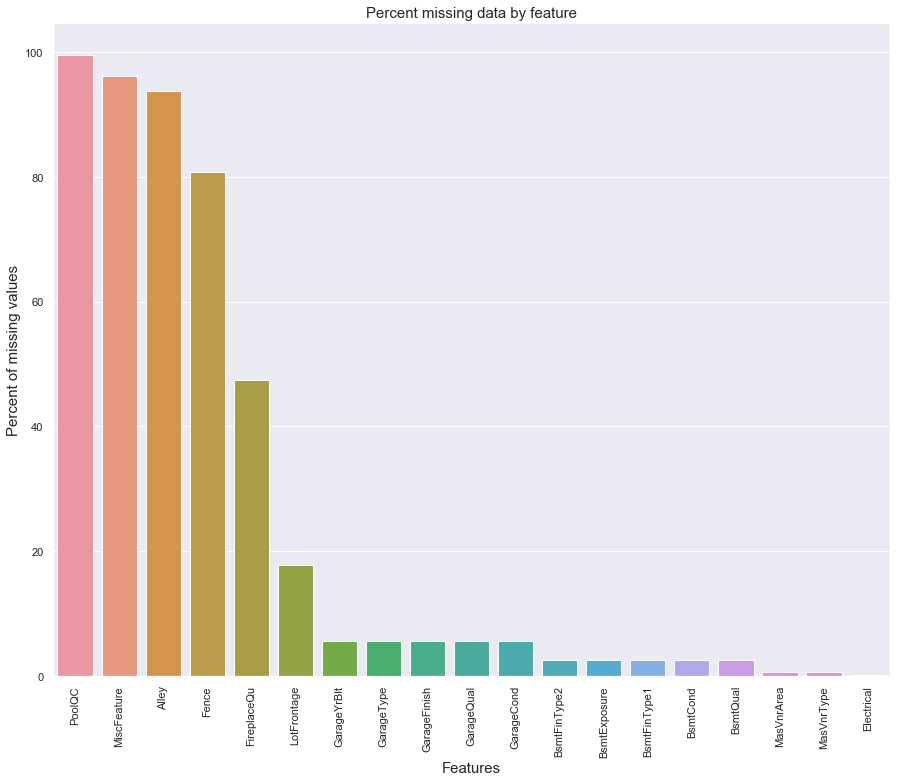

In [22]:
hsp_train_na = (hsp_train.isnull().sum() / len(hsp_train)) * 100
hsp_train_miss = hsp_train_na.drop(hsp_train_na[hsp_train_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=hsp_train_miss.index, y=hsp_train_miss)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Data Imputation

In [23]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    hsp_train[col].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

array([nan, 'Grvl', 'Pave'], dtype=object)

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

All of the above features have missing values, i.e those features are not there. So, we can impute the missing values with None.

In [24]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    hsp_train[col] = hsp_train[col].fillna('None')

In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    hsp_train[col].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

All of the above features have missing values, i.e those features are not there. So, we can impute the missing values with None.

In [26]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    hsp_train[col] = hsp_train[col].fillna('None')

In [27]:
hsp_train['GarageYrBlt'].isnull().value_counts()

False    1375
True       81
Name: GarageYrBlt, dtype: int64

The missing values in 'GarageYrBlt' represents there is no garage for this houses. So, we can impute those with zero.

In [28]:
hsp_train['GarageYrBlt'] = hsp_train['GarageYrBlt'].fillna(0)

In [29]:
hsp_train["MasVnrArea"].describe()

count    1448.000000
mean      102.087707
std       177.338930
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

Similarly, for MasVnrType and MasVnrArea, we an impute them with None and zero respectively.

In [30]:
hsp_train["MasVnrType"] = hsp_train["MasVnrType"].fillna("None")
hsp_train["MasVnrArea"] = hsp_train["MasVnrArea"].fillna(0)

In [31]:
hsp_train['LotFrontage'].isna().value_counts()

False    1197
True      259
Name: LotFrontage, dtype: int64

In [32]:
hsp_train["LotFrontage"] = hsp_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [33]:
hsp_train['Utilities'].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

The variable 'Utilities' have only one variable i.e AllPub. So, there is much variation in this variable. we can delete this variable.

In [34]:
hsp_train = hsp_train.drop(['Utilities'], axis=1)

In [35]:
hsp_train['Electrical'].value_counts()

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
hsp_train['Electrical'] = hsp_train['Electrical'].fillna('SBrkr')

In [37]:
miss = pd.DataFrame(hsp_train.isna().sum()[hsp_train.isna().sum() !=0].sort_values(ascending=False))
miss.columns = ['#Missing']
miss['Percent_Missing'] = hsp_train.isna().sum()/len(hsp_train) *100
miss

,#Missing,Percent_Missing
Id,NaN,0.0
MSSubClass,NaN,0.0
MSZoning,NaN,0.0
LotFrontage,NaN,0.0
LotArea,NaN,0.0
...,...,...
MoSold,NaN,0.0
YrSold,NaN,0.0
SaleType,NaN,0.0
SaleCondition,NaN,0.0


# Data Preprocessing

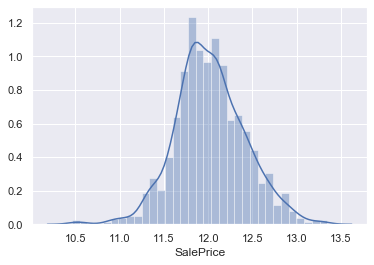

In [38]:
hsp_train['SalePrice'] = np.log(hsp_train['SalePrice'])
sns.distplot(hsp_train['SalePrice'])

In [39]:
hsp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216


In [40]:
hsp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            1456 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non

In [41]:
for col in ('MSSubClass', 'OverallCond', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold','MoSold'):
    hsp_train[col] = hsp_train[col].astype(str)

In [42]:
cat_features = hsp_train.select_dtypes(include=['object']).columns
cat_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder

for c in cat_features:
    lbl = LabelEncoder() 
    lbl.fit(list(hsp_train[c].values)) 
    hsp_train[c] = lbl.transform(list(hsp_train[c].values))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [44]:
# shape        
print('Shape all_data: {}'.format(hsp_train.shape))

Shape all_data: (1456, 80)


In [45]:
# Adding total sqfootage feature 
hsp_train['TotalSF'] = hsp_train['TotalBsmtSF'] + hsp_train['1stFlrSF'] + hsp_train['2ndFlrSF']

In [46]:
y = hsp_train['SalePrice']
hsp_all = hsp_train
hsp_all.drop(['Id','SalePrice','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)
print("hsp_all size is : {}".format(hsp_all.shape))

hsp_all size is : (1456, 76)


In [47]:
hsp_all = pd.get_dummies(hsp_all)

In [48]:
hsp_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,9,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,4,104,53,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,1,0,1,4,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,90,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4,2566
1,4,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,7,77,26,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1,0,1,4,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,63,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4,2524
2,9,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,4,102,52,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,1,0,1,4,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,88,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4,2706
3,10,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,4,19,20,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,1,2,1,4,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,85,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0,2473
4,9,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,4,101,50,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1,0,1,4,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,87,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4,3343


In [49]:
hsp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null int64
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null int64
Alley            1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null int64
LotConfig        1456 non-null int64
LandSlope        1456 non-null int64
Neighborhood     1456 non-null int64
Condition1       1456 non-null int64
Condition2       1456 non-null int64
BldgType         1456 non-null int64
HouseStyle       1456 non-null int64
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null int64
RoofMatl         1456 non-null int64
Exterior1st      1456 non-null int64
Exterior2nd      1456 non-null int64
MasVnrType       1456 non-null int64
Mas

In [50]:
y[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

# MODEL ESTIMATION

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(hsp_all, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

NameError: name 'hsp_all' is not defined

In [52]:
y_train

580     12.111212
582     11.682668
968     10.542706
744     12.100712
1405    12.524526
          ...    
765     12.484204
837     11.512925
1219    11.424094
560     11.707670
685     12.242887
Name: SalePrice, Length: 1092, dtype: float64

### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.9147461475466213
0.89981950996367


The Linear regression model has given us an accuracy of 91% on train data and 89% on test data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'RM')

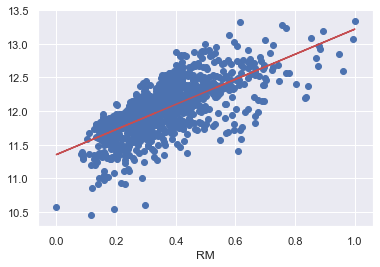

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,41].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

### SGD Regressor

In [55]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

-4.746337796533544e+18
-4.395407925967804e+18


The SGD Regressor has performed poorly due to un-optimised hyperparameters used. The model's accuracy can be improved by choosing optimal hyperparameters using GridSearchCV.

### Grid Search and CV on SGD Regressor

In [56]:
from sklearn.model_selection import GridSearchCV

grid =  {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2"]}


sgd=SGDRegressor(max_iter=1000)
grid = GridSearchCV(estimator=sgd, param_grid=grid,cv=10)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

c:\users\raodu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, 

#### Best parameters: {'alpha': 1, 'penalty': 'l2'}
#### Best cross-validation score: 0.42
The model has significantly imporoved on implementing Grid Search with Cross-Validation. The GridSearch chooses the best 
optimal hyperparameter for the model and also gives the best score for the chosen hyperparamter.

### Ridge Regreesor

In [57]:
from  sklearn.linear_model import Ridge

x_range = [0.0000000000000001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

Ridge(alpha=1e-16, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

[0.914746146945082, 0.9147449177788506, 0.9146762889234448, 0.9134555278437402, 0.9004773989577897, 0.8161551135892536]
[0.8998147403194295, 0.8998015814873259, 0.8996939032067899, 0.8989526654294023, 0.8908732864993634, 0.822392551612668]


Text(0.5, 0, '$\\alpha$')

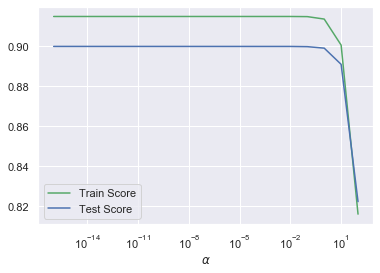

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Best score is 91% on Training data and 89% on Test data.

### Grid Search and CV on Ridge Regressor

In [59]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best parameters: {'alpha': 1.0}
Best cross-validation score: 0.89


#### Best parameters: {'alpha': 1.0}
#### Best cross-validation score: 0.89


### Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
x_range = [0.001,0.01,0.1,1,10 ]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[0.9021748273218627, 0.8106574810882774, 0.0, 0.0, 0.0]
[0.8994935599978772, 0.8280318499245743, -0.0016491339030018093, -0.0016491339030018093, -0.0016491339030018093]


Text(0.5, 0, '$\\alpha$')

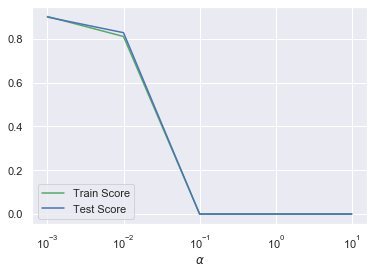

In [61]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Best Score on Lasso Regression is 90% on Training data and 89% on Test data.

### Grid Search and CV on Lasso Regressor

In [62]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100 ])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.80


#### Best parameters: {'alpha': 0.01}
#### Best cross-validation score: 0.80


### KNN Regressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

[1.0, 0.9084273968671699, 0.8632253029802083, 0.8430852209599554, 0.8257642077946836, 0.8184681504516796, 0.8101891828519374, 0.8023206979137981, 0.7974062952160577, 0.7928246514993436, 0.7877987905491441, 0.7815127602648966, 0.7759947693724765, 0.7754715901838074, 0.7717635888671108, 0.7689723012900221, 0.7656178444102757, 0.7628996239927401, 0.7613394290603978]
[0.6334791545682683, 0.7287674341852017, 0.7711101783177357, 0.7709387575051218, 0.767979819023484, 0.7649811393381241, 0.7673720810541862, 0.7684355927420635, 0.7666571842981547, 0.7649953813926771, 0.7684302046849664, 0.7706932292181468, 0.7705516553853963, 0.7653018960203503, 0.7620965566243527, 0.7616571619892226, 0.7589064583544084, 0.7584873877213515, 0.7575597672660628]


Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

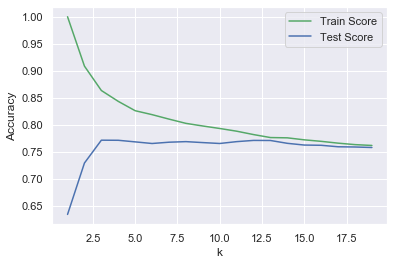

In [64]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#### The Best K value here is K=3 from graph

### Grid Search and CV on KNN Regressor

In [65]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=19, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.74


#### Best parameters: {'n_neighbors': 8}
#### Best cross-validation score: 0.74

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003192,0.000747,0.014361,0.001621,1,{'n_neighbors': 1},0.660036,0.696258,0.600781,0.729512,0.598179,0.642804,0.456605,0.691692,0.512550,0.664852,0.625424,0.081132,19
1,0.002792,0.000399,0.013963,0.000446,2,{'n_neighbors': 2},0.712743,0.747740,0.621937,0.748302,0.686107,0.664154,0.609749,0.761571,0.571064,0.726683,0.685088,0.062723,18
2,0.003092,0.000537,0.014561,0.000489,3,{'n_neighbors': 3},0.752170,0.735507,0.642242,0.786322,0.700065,0.705983,0.647082,0.775245,0.617088,0.752312,0.711461,0.056162,17
3,0.002793,0.000399,0.014362,0.000489,4,{'n_neighbors': 4},0.771592,0.737660,0.629253,0.789817,0.726311,0.722168,0.676183,0.790903,0.606334,0.754044,0.720489,0.060918,16
4,0.002892,0.000299,0.014561,0.000489,5,{'n_neighbors': 5},0.762424,0.765830,0.641723,0.794446,0.739366,0.728326,0.674015,0.801748,0.641655,0.774168,0.732428,0.056844,7


Text(0.5, 0, 'Value of K for KNN')

Text(0, 0.5, 'Cross-Validated Accuracy')

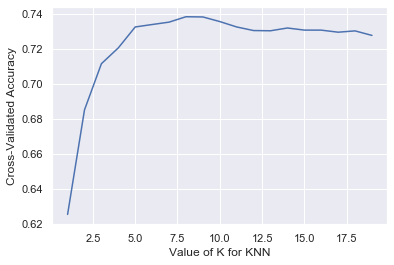

In [67]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = pd.DataFrame(grid.cv_results_)
grid_mean_scores.head()

# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Polynomial Regression

In [68]:
train_score_list = []
test_score_list = []
from  sklearn.preprocessing  import PolynomialFeatures

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
train_score_list
test_score_list

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[0.9143272856222051, 1.0, 1.0]

[0.8996846837220854, 0.5737656037507594, 0.7846742627477498]

#### Best score for Polynomial Regression is 89.9%

Text(0.5, 0, 'degree')

Text(0, 0.5, 'accuracy')

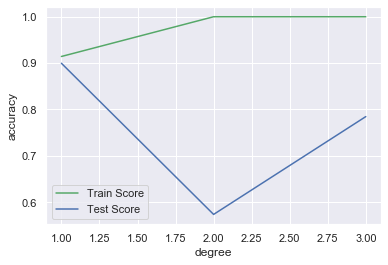

In [69]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

### Support Vector Regressor

#### Linear Kernel

In [70]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
svr_reg=regressor.fit(X_train,y_train)

print(svr_reg.score(X_train, y_train))
print(svr_reg.score(X_test, y_test))

0.9112552172186196
0.8964752108924244


#### RBF Kernel

In [71]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
svr_reg=regressor.fit(X_train,y_train)

print(svr_reg.score(X_train, y_train))
print(svr_reg.score(X_test, y_test))

0.8997035108969541
0.8895350089015714


### Grid search with Cross Validation on SVR 

In [72]:
param_grid = {'kernel':('linear', 'rbf'),'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'kernel': ('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
sv_r=SVR()
grid_search = GridSearchCV(sv_r, param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.89


#### Best parameters:{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
#### Best cross-validation score: 0.89

In [75]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033131,0.001458,0.007568,0.000503,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.647253,0.594708,0.624465,0.664283,0.652986,0.636710,0.024712,42
1,0.063032,0.001473,0.013763,0.000400,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",-0.006638,0.002347,-0.022394,0.003411,0.002238,-0.004203,0.009783,63
2,0.033308,0.000457,0.007788,0.000383,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.647253,0.594708,0.624465,0.664283,0.652986,0.636710,0.024712,42
3,0.061222,0.002416,0.013578,0.000492,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.018786,0.026352,0.002006,0.032328,0.029564,0.021809,0.010879,58
4,0.030685,0.000383,0.007204,0.000419,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.647253,0.594708,0.624465,0.664283,0.652986,0.636710,0.024712,42


c:\users\raodu\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\raodu\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


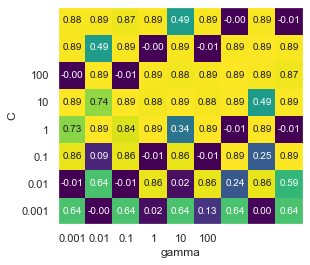

In [76]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(8,9)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

### CONCLUSION

#### From our analysis, the best Regression model using Gridsearch and cross validation is Ridge Regressor and Support Vector Regressor with an accuracy of 89% and the best optimal hyperparameters used for Ridge regressor are {'alpha': 1.0} and for Support Vector Regressor are{C': 10, 'gamma': 0.01, 'kernel': 'rbf'} respectively.
